# Detectron2 Beginner's Tutorial -- AMMI CV Week 2 Lab 1

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 5.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=a2c60aa804507b8777716f1f7de93d7bdb45dc987a3096498e526109ddcdd194
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.2MB 796kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=b1719d48c9464ce2f7a04267c5c0cd700bf46a63f0bed13d1b9482bf9bfd3c51
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

# Read images for object detection



In [ ]:
# read images 
im1 = cv2.imread("/content/drive/MyDrive/detectron/cat_1.jpeg")
im2 = cv2.imread("/content/drive/MyDrive/detectron/hug_2.jpeg")
im3 = cv2.imread("/content/drive/MyDrive/detectron/hug_3.jpeg")
im4 = cv2.imread("/content/drive/MyDrive/detectron/night_1.jpeg")
im5 = cv2.imread("/content/drive/MyDrive/detectron/crowded_1.jpeg")
im6 = cv2.imread("/content/drive/MyDrive/detectron/trip.jpeg")
im7 = cv2.imread("/content/drive/MyDrive/detectron/cat_2.jpeg")
im8 = cv2.imread("/content/drive/MyDrive/detectron/cat_blended.png")
im9 = cv2.imread("/content/drive/MyDrive/detectron/cat_blended_2.jpeg")
im10 = cv2.imread("/content/drive/MyDrive/detectron/cat_blended_3.jpeg")
im10 = cv2.imread("/content/drive/MyDrive/detectron/cat_blended_4.jpeg")
im11 = cv2.imread("/content/drive/MyDrive/detectron/me.jpeg")


Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im1)

model_final_f10217.pkl: 178MB [00:10, 16.2MB/s]                           


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([15], device='cuda:0')
Boxes(tensor([[241.0681, 182.4972, 623.5922, 490.3836]], device='cuda:0'))


In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
def show_prediction(im, predictor):
  """
  visualize the box around the detected object 
  """
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  cv2.imwrite('img.jpg',out.get_image()[:, :, ::-1])

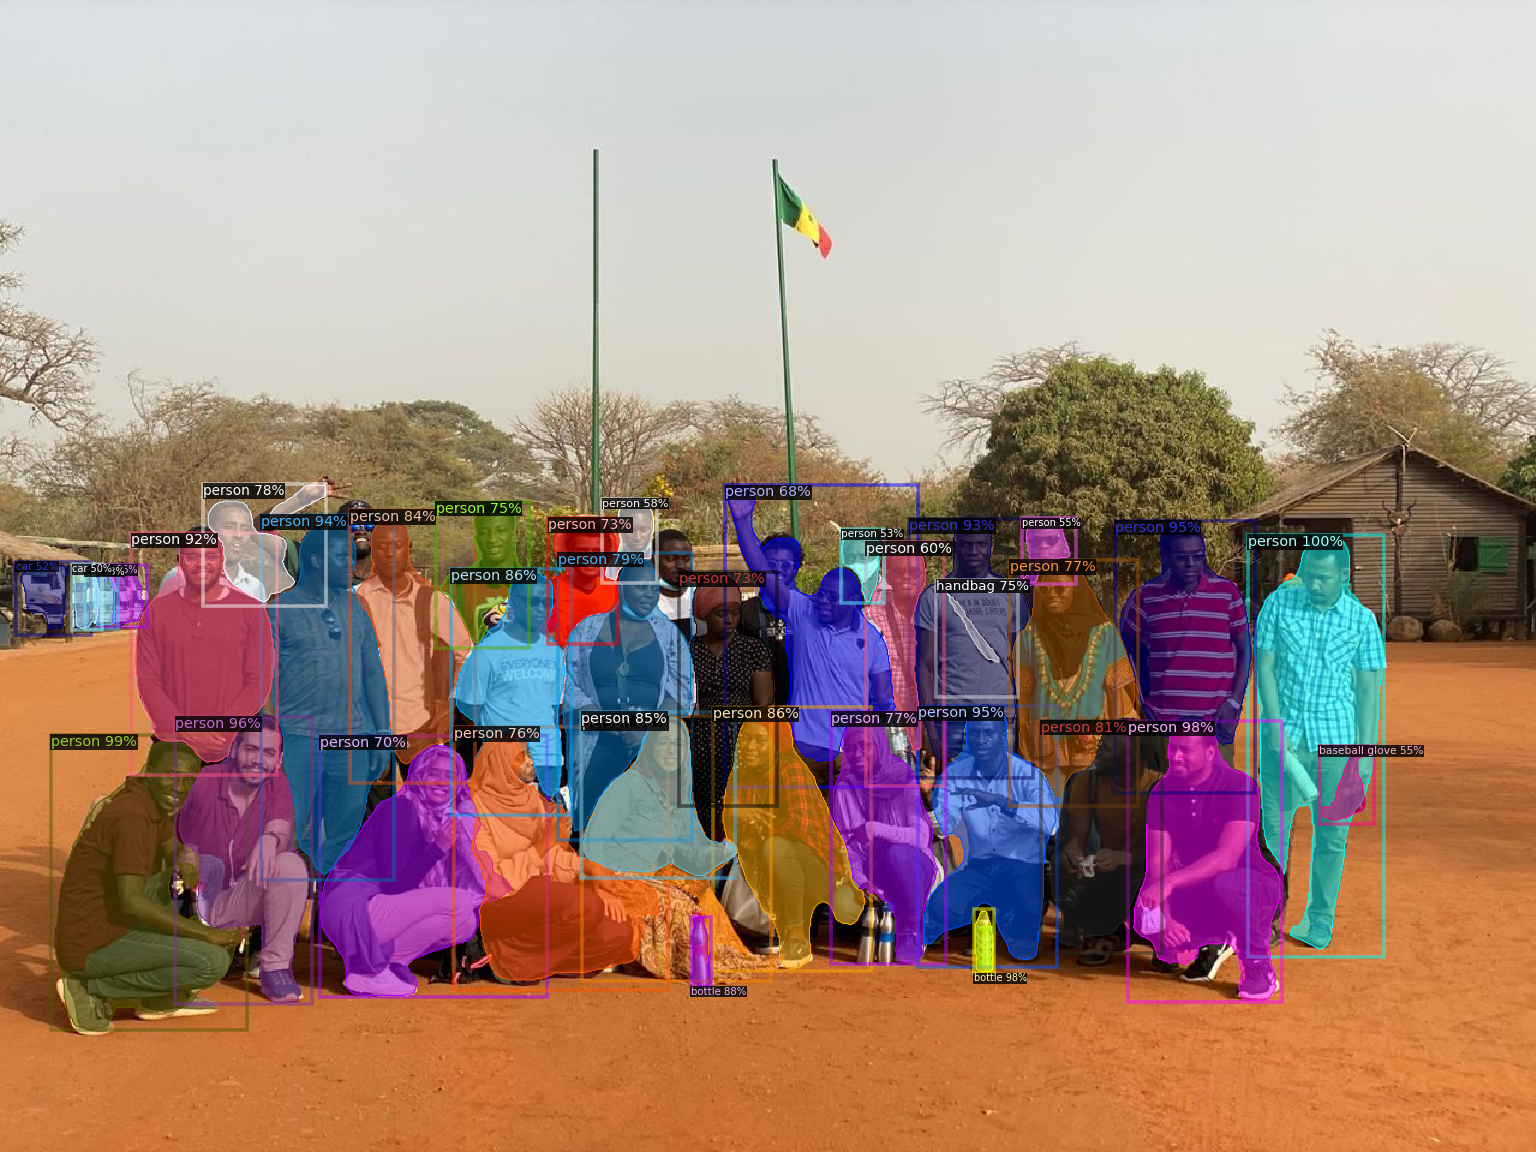

In [ ]:
show_prediction(im6,predictor)

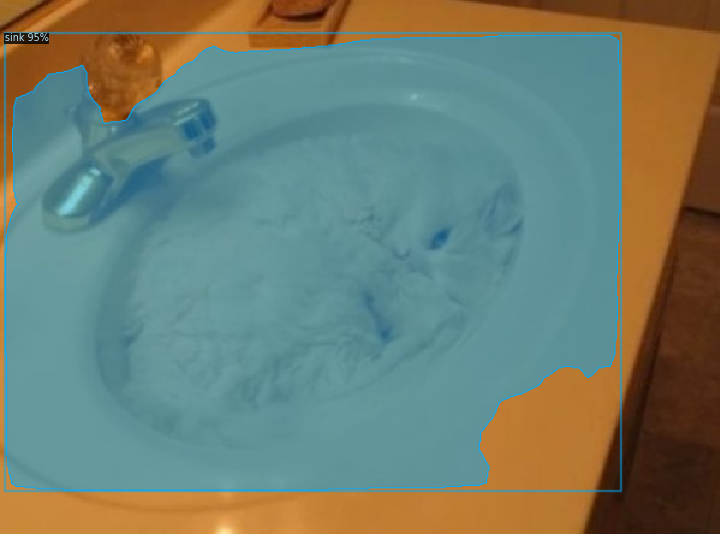

In [ ]:
show_prediction(im10,predictor)


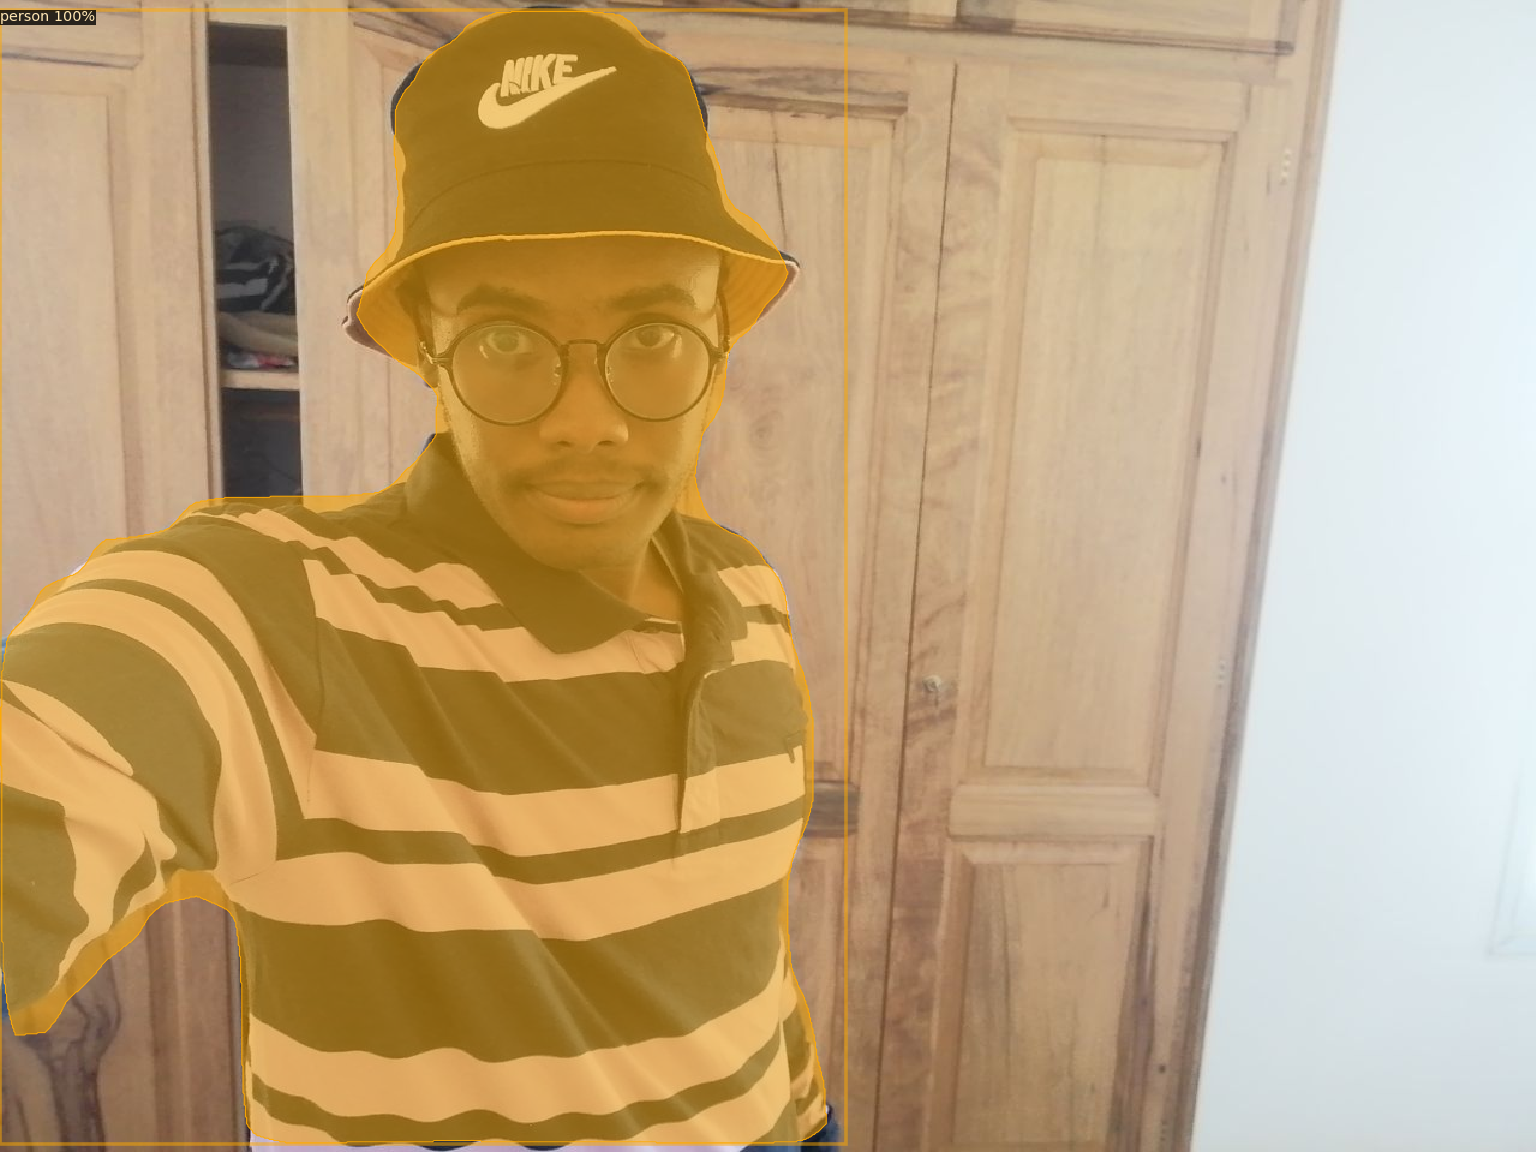

In [ ]:
show_prediction(im11,predictor)


# Human pose estimation

# Read Images for pose estimation

In [ ]:
im1 = cv2.imread("/content/drive/MyDrive/detectron/pose_1.jpeg")
im2 = cv2.imread("/content/drive/MyDrive/detectron/pose_2.jpeg")
im3 = cv2.imread("/content/drive/MyDrive/detectron/pose_3.jpeg")
im4 = cv2.imread("/content/drive/MyDrive/detectron/hug_4.jpeg")

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config

# Navigate to the Detectron2 Model Zoo and figure out a suitable model yaml configuration
# file to use. Follow the example above as a template.
# Model Zoo: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

CONFIG_FILE = "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE)
predictor = DefaultPredictor(cfg)
# outputs = predictor(im)
# v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
def showPoseEstimation(im, predictor):
  """
  plot pose estimation
  """
  outputs = predictor(im)
  v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  cv2.imwrite('img.jpeg',out.get_image()[:, :, ::-1])

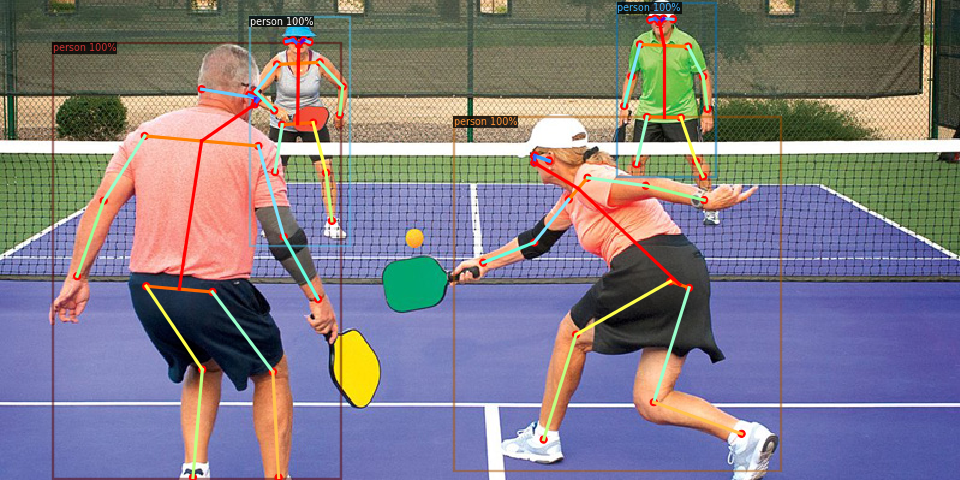

In [ ]:
showPoseEstimation(im1,predictor)

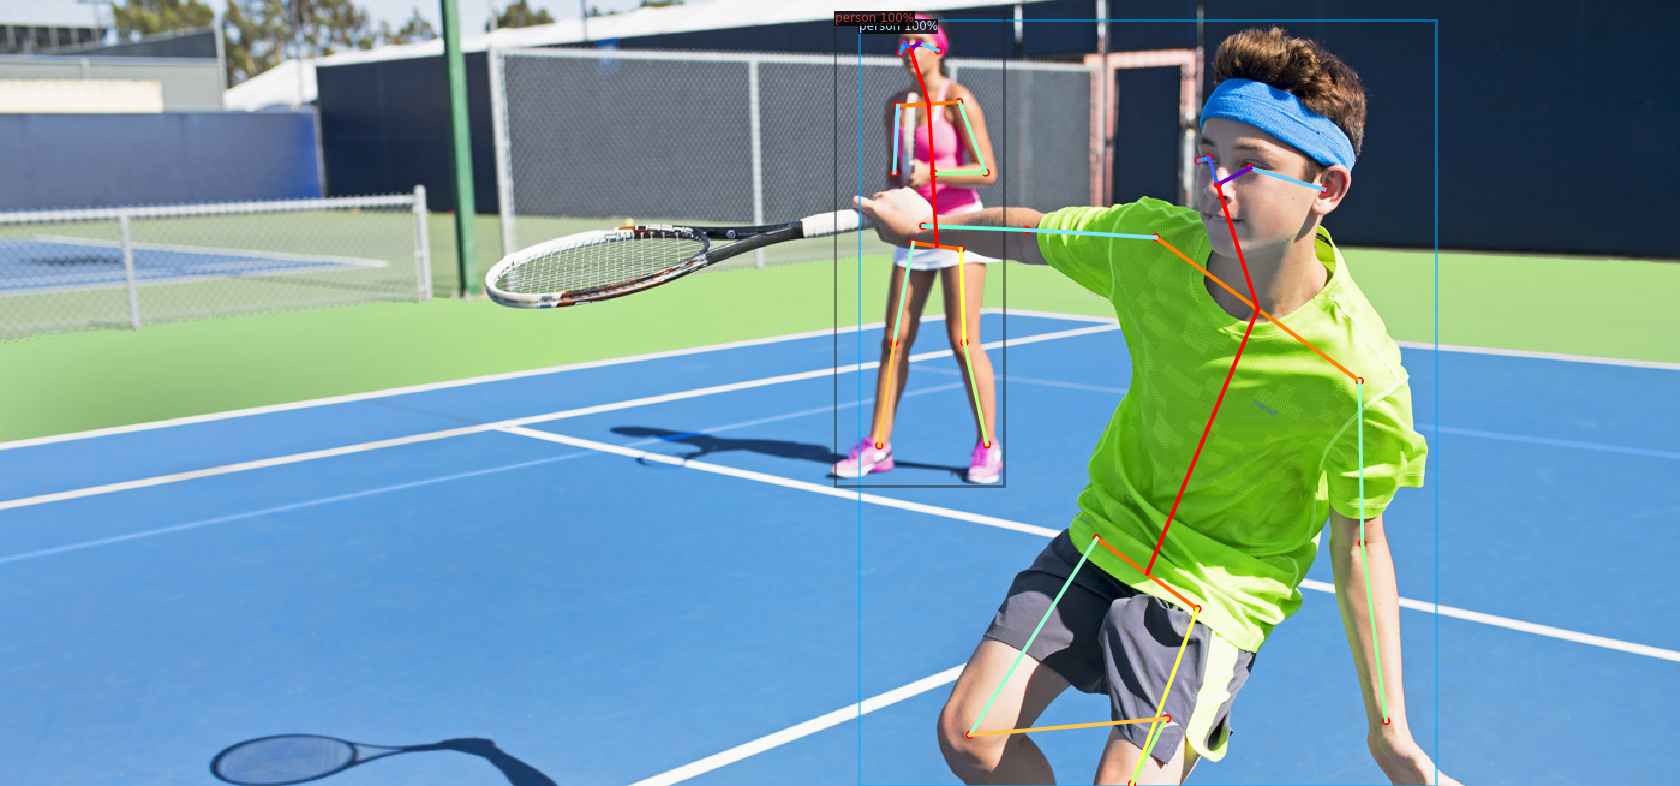

In [ ]:
showPoseEstimation(im3,predictor)


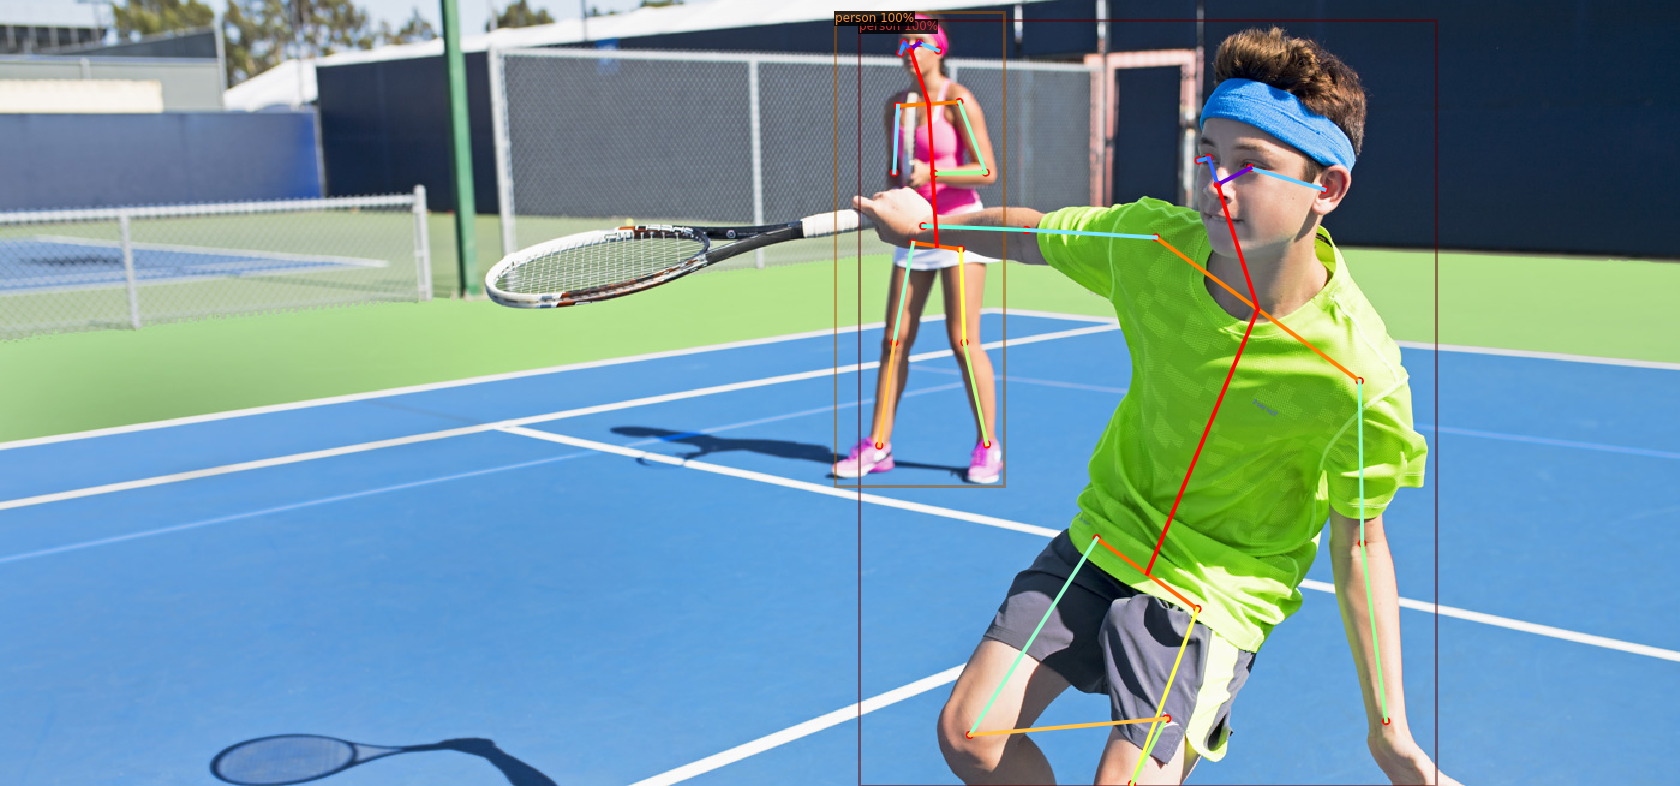

In [ ]:
showPoseEstimation(im1,predictor)
